# Feature Engineering

## Read in Data

In [170]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set(style="whitegrid")
import pprint
%matplotlib inline

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [124]:
df_train = pd.read_csv('./data/train.csv') 
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [90]:
df_test = pd.read_csv('./data/test.csv') 
df_test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


## Add features

In [91]:
df_train['year'] = df_train['datetime'].str[0:4].astype(int)
df_train['month'] = df_train['datetime'].str[5:7].astype(int)

# 0 for Monday to 5 for Saturday
df_train['dayofweek'] = [datetime.date(datetime.strptime(time, '%Y-%m-%d')).weekday() for time in df_train['datetime'].str[:10]]
df_train['hour'] = df_train['datetime'].str[11:13].astype(int)

In [92]:
df_clean = df_train.loc[:, ['year', 'month', 'dayofweek', 'hour', 'season', 'holiday', 'workingday', 
                            'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
df_clean.head(10)

,year,month,dayofweek,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,5,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011,1,5,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011,1,5,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011,1,5,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011,1,5,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011,1,5,5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011,1,5,6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011,1,5,7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011,1,5,8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011,1,5,9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [93]:
df_test['year'] = df_test['datetime'].str[0:4].astype(int)
df_test['month'] = df_test['datetime'].str[5:7].astype(int)
df_test['dayofweek'] = [datetime.date(datetime.strptime(time, '%Y-%m-%d')).weekday() for time in df_test['datetime'].str[:10]]
df_test['hour'] = df_test['datetime'].str[11:13].astype(int)

In [94]:
df_test_clean = df_test.loc[:, ['year', 'month', 'dayofweek', 'hour', 'season', 'holiday', 'workingday', 
                          'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
df_test_clean.head(10)

,year,month,dayofweek,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,3,0,1,0,1,1,10.66,11.365,56,26.0027
1,2011,1,3,1,1,0,1,1,10.66,13.635,56,0.0000
2,2011,1,3,2,1,0,1,1,10.66,13.635,56,0.0000
3,2011,1,3,3,1,0,1,1,10.66,12.880,56,11.0014
4,2011,1,3,4,1,0,1,1,10.66,12.880,56,11.0014
5,2011,1,3,5,1,0,1,1,9.84,11.365,60,15.0013
6,2011,1,3,6,1,0,1,1,9.02,10.605,60,15.0013
7,2011,1,3,7,1,0,1,1,9.02,10.605,55,15.0013
8,2011,1,3,8,1,0,1,1,9.02,10.605,55,19.0012
9,2011,1,3,9,1,0,1,2,9.84,11.365,52,15.0013


## Feature Standardization

In [95]:
scaler = preprocessing.StandardScaler()

In [96]:
temp_scale = scaler.fit(df_clean[['temp']])
atemp_scale = scaler.fit(df_clean[['atemp']])
humidity_scale = scaler.fit(df_clean[['humidity']])
windspeed_scale = scaler.fit(df_clean[['windspeed']])

In [97]:
df_clean['temp'] = scaler.fit_transform(df_clean[['temp']], temp_scale)
df_clean['atemp'] = scaler.fit_transform(df_clean[['atemp']], atemp_scale)
df_clean['humidity'] = scaler.fit_transform(df_clean[['humidity']], humidity_scale)
df_clean['windspeed'] = scaler.fit_transform(df_clean[['windspeed']], windspeed_scale)

In [98]:
df_clean.head(10)

,year,month,dayofweek,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,5,0,1,0,0,1,-1.333661,-1.092737,0.993213,-1.567754,3,13,16
1,2011,1,5,1,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,8,32,40
2,2011,1,5,2,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,5,27,32
3,2011,1,5,3,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,3,10,13
4,2011,1,5,4,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,0,1,1
5,2011,1,5,5,1,0,0,2,-1.333661,-1.271515,0.681430,-0.832442,0,1,1
6,2011,1,5,6,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,2,0,2
7,2011,1,5,7,1,0,0,1,-1.544154,-1.271515,1.253032,-1.567754,1,2,3
8,2011,1,5,8,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,1,7,8
9,2011,1,5,9,1,0,0,1,-0.912675,-0.735182,0.733394,-1.567754,8,6,14


## Remove outliers

In [99]:
df_without_outliers = df_clean[np.abs(df_clean["count"] - df_clean["count"].mean()) <= (3 * df_clean["count"].std())] 
df_without_outliers.head(10)

,year,month,dayofweek,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,5,0,1,0,0,1,-1.333661,-1.092737,0.993213,-1.567754,3,13,16
1,2011,1,5,1,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,8,32,40
2,2011,1,5,2,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,5,27,32
3,2011,1,5,3,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,3,10,13
4,2011,1,5,4,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,0,1,1
5,2011,1,5,5,1,0,0,2,-1.333661,-1.271515,0.681430,-0.832442,0,1,1
6,2011,1,5,6,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,2,0,2
7,2011,1,5,7,1,0,0,1,-1.544154,-1.271515,1.253032,-1.567754,1,2,3
8,2011,1,5,8,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,1,7,8
9,2011,1,5,9,1,0,0,1,-0.912675,-0.735182,0.733394,-1.567754,8,6,14


In [100]:
print("Data size before removing outliers: ", df_clean.shape)
print("Data size after removing outliers: ", df_without_outliers.shape)

Data size before removing outliers:  (10886, 15)
Data size after removing outliers:  (10739, 15)


## Logarithm transformation

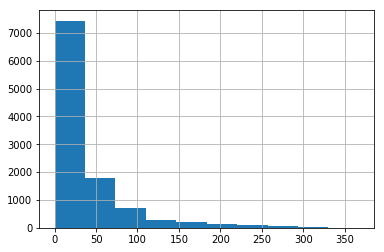

In [101]:
df_without_outliers['casual'].hist()

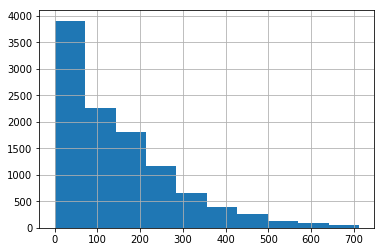

In [102]:
df_without_outliers['registered'].hist()

In [103]:
df2 = df_without_outliers.copy(deep=True)

df2['log_casual'] = np.log(df2['casual'] + 1)
df2['log_register'] = np.log(df2['registered'] + 1)
df2.head(10)

,year,month,dayofweek,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_casual,log_register
0,2011,1,5,0,1,0,0,1,-1.333661,-1.092737,0.993213,-1.567754,3,13,16,1.386294,2.639057
1,2011,1,5,1,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,8,32,40,2.197225,3.496508
2,2011,1,5,2,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,5,27,32,1.791759,3.332205
3,2011,1,5,3,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,3,10,13,1.386294,2.397895
4,2011,1,5,4,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,0,1,1,0.000000,0.693147
5,2011,1,5,5,1,0,0,2,-1.333661,-1.271515,0.681430,-0.832442,0,1,1,0.000000,0.693147
6,2011,1,5,6,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,2,0,2,1.098612,0.000000
7,2011,1,5,7,1,0,0,1,-1.544154,-1.271515,1.253032,-1.567754,1,2,3,0.693147,1.098612
8,2011,1,5,8,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,1,7,8,0.693147,2.079442
9,2011,1,5,9,1,0,0,1,-0.912675,-0.735182,0.733394,-1.567754,8,6,14,2.197225,1.945910


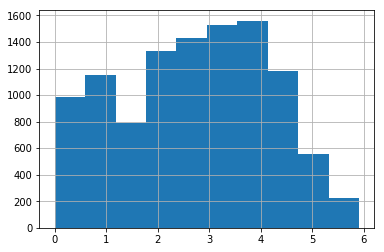

In [104]:
df2['log_casual'].hist()

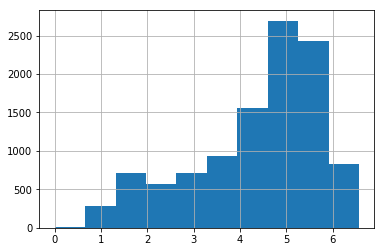

In [105]:
df2['log_register'].hist()

## Features Selection

In [161]:
# Feature correlation matrix
fea_cols=['year', 'month', 'dayofweek', 'hour', 'season', 'holiday', 'workingday', 
          'weather', 'temp', 'atemp', 'humidity', 'windspeed']

df2[fea_cols].corr()

,year,month,dayofweek,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
year,1.000000,-0.009698,0.002727,-0.013364,-0.009936,0.014461,-0.011337,-0.009068,0.049149,0.046747,-0.071137,-0.016863
month,-0.009698,1.000000,-0.000423,-0.008637,0.971783,0.002544,-0.006159,0.012425,0.257477,0.264136,0.206028,-0.151127
dayofweek,0.002727,-0.000423,1.000000,0.002046,-0.008587,-0.193879,-0.704789,-0.048403,-0.032551,-0.034088,-0.030547,-0.023417
hour,-0.013364,-0.008637,0.002046,1.000000,-0.008423,0.001197,-0.003258,-0.020216,0.136961,0.132128,-0.273058,0.145668
season,-0.009936,0.971783,-0.008587,-0.008423,1.000000,0.030368,-0.011228,0.008989,0.258933,0.265098,0.192185,-0.147608
holiday,0.014461,0.002544,-0.193879,0.001197,0.030368,1.000000,-0.249896,-0.007732,0.002526,-0.003091,0.000478,0.008708
workingday,-0.011337,-0.006159,-0.704789,-0.003258,-0.011228,-0.249896,1.000000,0.036463,0.021978,0.016831,-0.005637,0.012112
weather,-0.009068,0.012425,-0.048403,-0.020216,0.008989,-0.007732,0.036463,1.000000,-0.052114,-0.052922,0.405675,0.006146
temp,0.049149,0.257477,-0.032551,0.136961,0.258933,0.002526,0.021978,-0.052114,1.000000,0.985254,-0.056394,-0.019460
atemp,0.046747,0.264136,-0.034088,0.132128,0.265098,-0.003091,0.016831,-0.052922,0.985254,1.000000,-0.035467,-0.059403


In [162]:
#drop atemp due to high correlation with temp
fea_cols=['year', 'month', 'dayofweek', 'hour', 'season', 'holiday', 'workingday', 
          'weather', 'temp', 'humidity', 'windspeed']

### Feature importance by Random Forest

In [177]:
# For casual users
rf_cas = RandomForestRegressor(n_estimators = 1000, min_samples_split = 12, oob_score = True)
rf_cas.fit(df2[fea_cols].values, df2['log_casual'].values)

print("The oob score of the RF model for casual users is" , rf_cas.oob_score_)

The oob score of the RF model for casual users is 0.8943231258962037


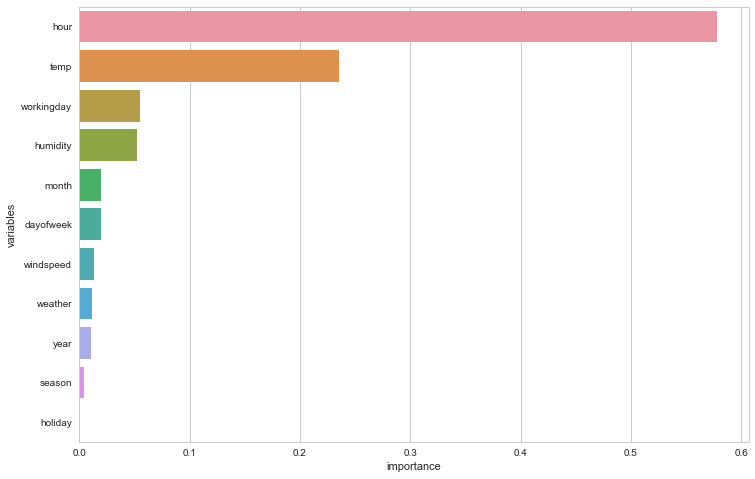

In [178]:
features_imp_cas = pd.DataFrame(rf_cas.feature_importances_, columns = ['importance'])
features_imp_cas['variables'] = fea_cols

plt.figure(figsize=(12,8))
features_imp_cas = features_imp_cas.sort_values(by = 'importance', ascending = False)
ax = sns.barplot(x = 'importance', y = 'variables', data = features_imp_cas)

In [179]:
# For registered users
rf_reg = RandomForestRegressor(n_estimators = 1000, min_samples_split = 12, oob_score = True)
rf_reg.fit(df2[fea_cols].values, df2['log_register'].values)

print("The oob score of the RF model for registered users is" , rf_reg.oob_score_)

The oob score of the RF model for registered users is 0.9539448258235265


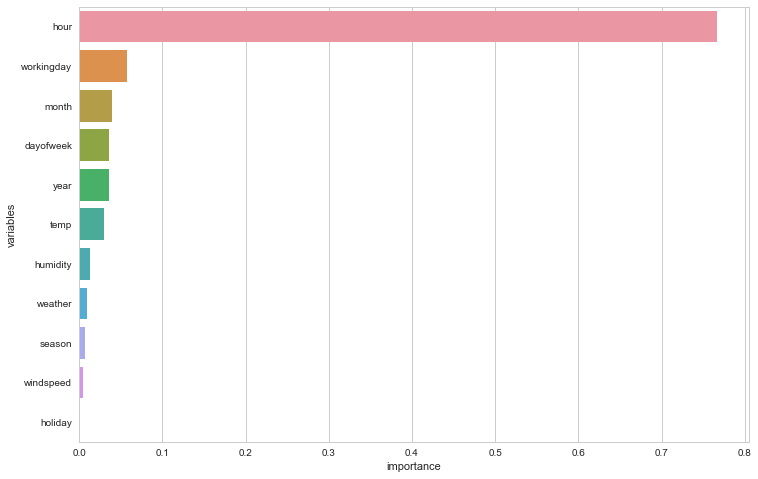

In [180]:
features_imp_reg = pd.DataFrame(rf_reg.feature_importances_, columns = ['importance'])
features_imp_reg['variables'] = fea_cols

plt.figure(figsize=(12,8))
features_imp_reg = features_imp_reg.sort_values(by = 'importance', ascending = False)
ax = sns.barplot(x = 'importance', y = 'variables', data = features_imp_reg)

### Select Features

In [181]:
# Drop features with importance less than 0.01

fea_cols_cas = features_imp_cas[features_imp_cas['importance'] > 0.01]
fea_cols_reg = features_imp_reg[features_imp_reg['importance'] > 0.01]
print("Selected features for casual users are", fea_cols_cas['variables'].values)
print("Selected features for registered users are", fea_cols_reg['variables'].values)

Selected features for casual users are ['hour' 'temp' 'workingday' 'humidity' 'month' 'dayofweek' 'windspeed'
 'weather' 'year']
Selected features for registered users are ['hour' 'workingday' 'month' 'dayofweek' 'year' 'temp' 'humidity']


In [186]:
# For casual users
rf_cas.fit(df2[fea_cols_cas['variables']].values, df2['log_casual'].values)

print("The oob score of the RF model for casual users is" , rf_cas.oob_score_)

The oob score of the RF model for casual users is 0.8946030354361536


In [187]:
# For registered users

rf_reg.fit(df2[fea_cols_reg['variables']].values, df2['log_register'].values)

print("The oob score of the RF model for registered users is" , rf_reg.oob_score_)

The oob score of the RF model for registered users is 0.9512728145508292


### Making Prediction 

In [ ]:
#Total bike demand
pred_total = (exp(pred_cas) - 1) + (exp(pred_reg) - 1)